In [1]:
#import important libraries
import numpy as np
import pandas as pd
from pandas import DataFrame

import statistics
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as p9
import pylab 

In [3]:
#import CSV file
med_data = pd.read_csv("~/Documents/WGU/D207 - Exploratory Data Analysis/medical_clean.csv")

In [4]:
#Removing columns not needed for this exercise
med_data.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job'], axis=1, inplace=True)

In [5]:
#Treating Outliers in the dataset
med_data['Income'] = np.where(med_data['Income'] > 91368, np.nan, med_data['Income'])
med_data['Income'].fillna(med_data['Income'].median(), inplace=True)

med_data['Population'] = np.where(med_data['Population'] > 4091.625, np.nan, med_data['Population'])
med_data['Population'].fillna(med_data['Population'].median(), inplace=True)

med_data['Children'] = np.where(med_data['Children'] > 7.5, np.nan, med_data['Children'])
med_data['Children'].fillna(med_data['Children'].median(), inplace=True)

med_data['Additional_charges'] = np.where(med_data['Additional_charges'] > 19568.14, np.nan, med_data['Additional_charges'])
med_data['Additional_charges'].fillna(med_data['Additional_charges'].mean(), inplace=True)

med_data['VitD_levels'] = np.where(med_data['VitD_levels'] > 23.332305, np.nan, med_data['VitD_levels'])
med_data['VitD_levels'] = np.where(med_data['VitD_levels'] < 12.639271, np.nan, med_data['VitD_levels'])
med_data['VitD_levels'].fillna(med_data['VitD_levels'].median(), inplace=True)

In [6]:
#2-sample T-test

rural = med_data[med_data.Area == 'Rural'].VitD_levels
suburban = med_data[med_data.Area == 'Suburban'].VitD_levels

t_result = stats.ttest_ind(rural, suburban)

alpha = 0.05

if (t_result[1] < alpha):
    print("Vitamin D levels in rural areas and suburban areas are significantly different!")
    print("")
    print("Test Statistic:", round(t_result[0],5))
    print("P-Value:", round(t_result[1],5))
else: 
    print("Vitamin D levels in rural areas and suburban areas are not significantly different.")
    print("")
    print("Test Statistic:", round(t_result[0],5))
    print("P-Value:", round(t_result[1],5))

Vitamin D levels in rural areas and suburban areas are not significantly different.

Test Statistic: -0.36873
P-Value: 0.71234


In [7]:
rmean = rural.mean()
smean = suburban.mean()
print("Rural average Vitamin D levels are   ", round(rmean,5))
print("Suburban average Vitamin D levels are", round(smean,5))

Rural average Vitamin D levels are    17.91277
Suburban average Vitamin D levels are 17.93031


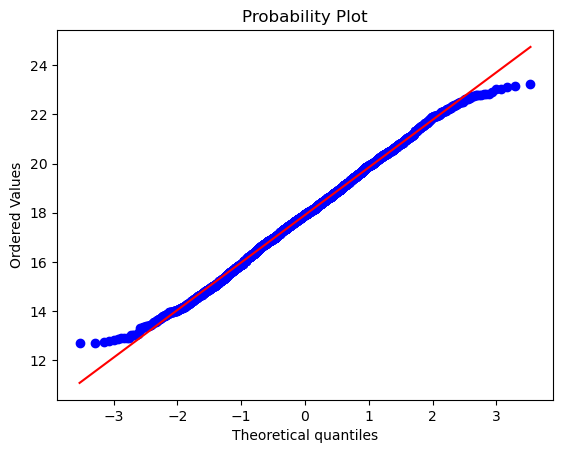

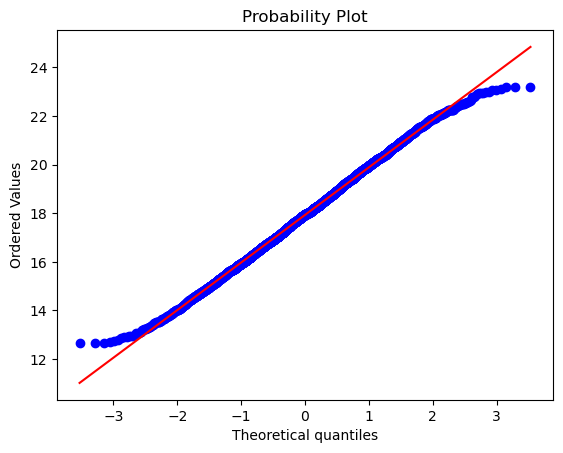

In [8]:
#Q-Q Plot in Python
tq_r = stats.probplot(rural, dist="norm", plot=pylab)
pylab.show()
tq_s = stats.probplot(suburban, dist="norm", plot=pylab)
pylab.show()

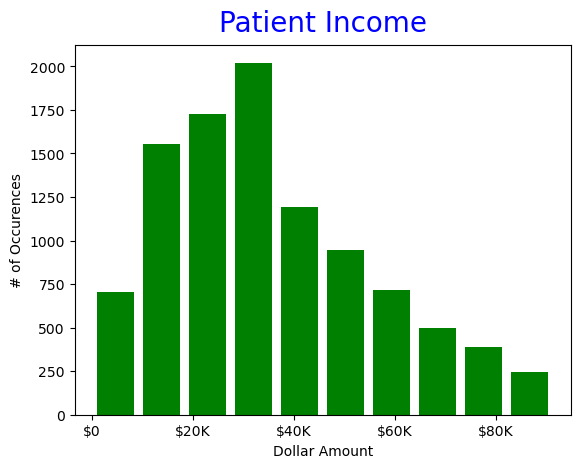

In [9]:
#Univariate Histogram of continuous variable - Income
plt.hist(med_data.Income, rwidth=0.8, color='green')
plt.xlabel('Dollar Amount')
plt.ylabel('# of Occurences')
plt.xticks([0, 20000, 40000, 60000, 80000], ['$0', '$20K', '$40K', '$60K', '$80K'])
plt.title('Patient Income', fontsize=20, pad=10, color='blue')
plt.show()

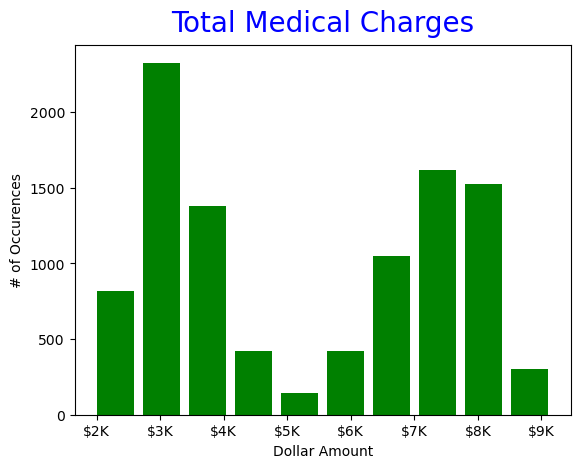

In [10]:
#Univariate Histogram of continuous variable - TotalCharge
plt.hist(med_data.TotalCharge, rwidth=0.8, color='green')
plt.xlabel('Dollar Amount')
plt.ylabel('# of Occurences')
plt.xticks([2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000], ['$2K', '$3K', '$4K', '$5K', '$6K', '$7K', '$8K', '$9K'])
plt.title('Total Medical Charges', fontsize=20, pad=10, color='blue')
plt.show()

Text(0.5, 1.0, 'Marital Status')

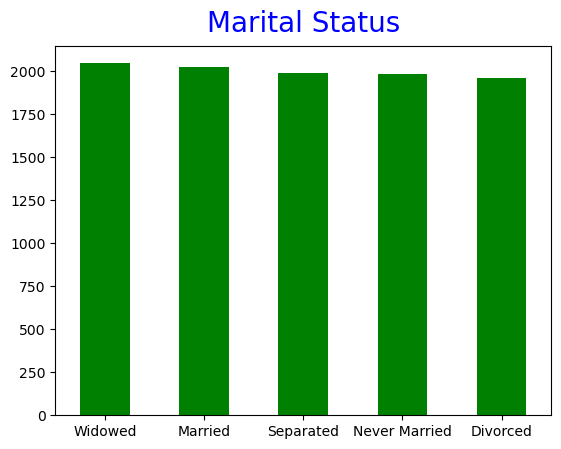

In [11]:
#Univariate Bar Plot of categorical variable - Marital
ax = med_data['Marital'].value_counts().plot.bar(rot=0, color='green')
ax.set_title('Marital Status', fontsize=20, pad=10, color='blue')

Text(0.5, 1.0, 'Complication Risk Measurements')

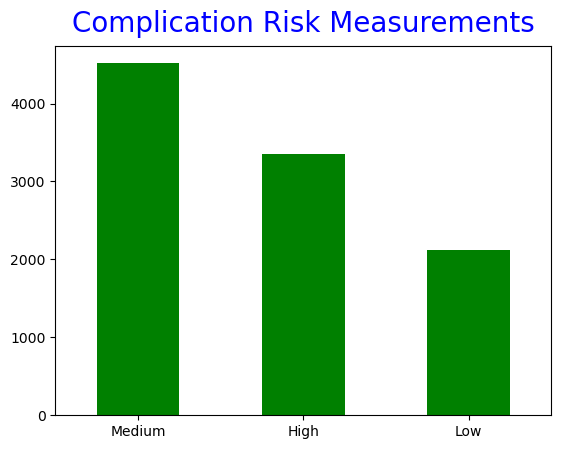

In [12]:
#Univariate Bar Plot of categorical variable - Complication_risk
ax = med_data['Complication_risk'].value_counts().plot.bar(rot=0, color='green')
ax.set_title('Complication Risk Measurements', fontsize=20, pad=10, color='blue')

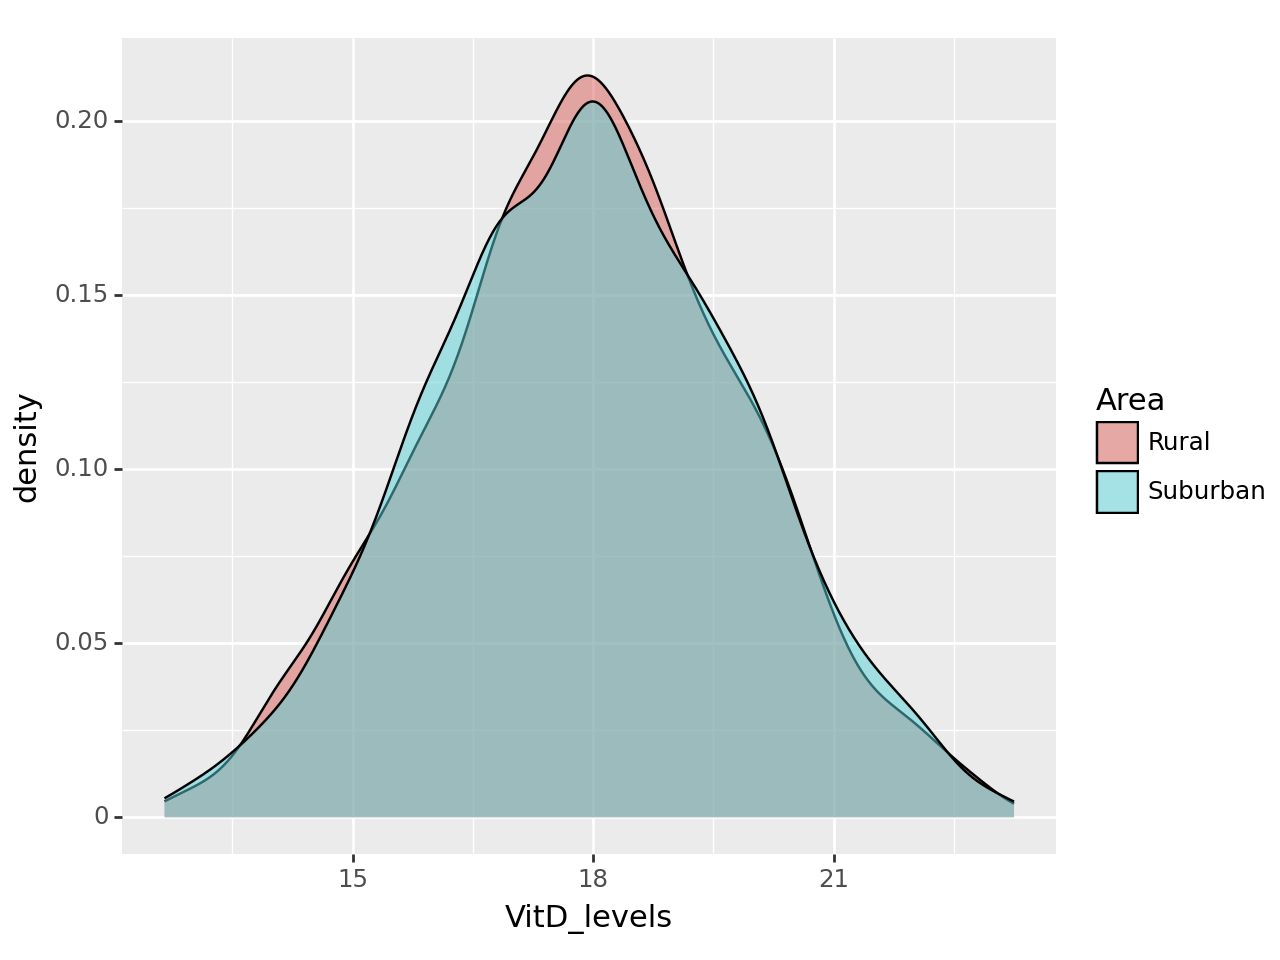

In [13]:
#Bivariate Density Plot - Suburban vs. Rural Vitamin D levels

#remove Suburban values from Area variable
area_med_data = med_data[(med_data['Area'] == 'Suburban') | (med_data['Area'] == 'Rural')]

print(p9.ggplot(area_med_data) 
      + p9.aes(x='VitD_levels', fill='Area') 
      + p9.geom_density(alpha=0.5))

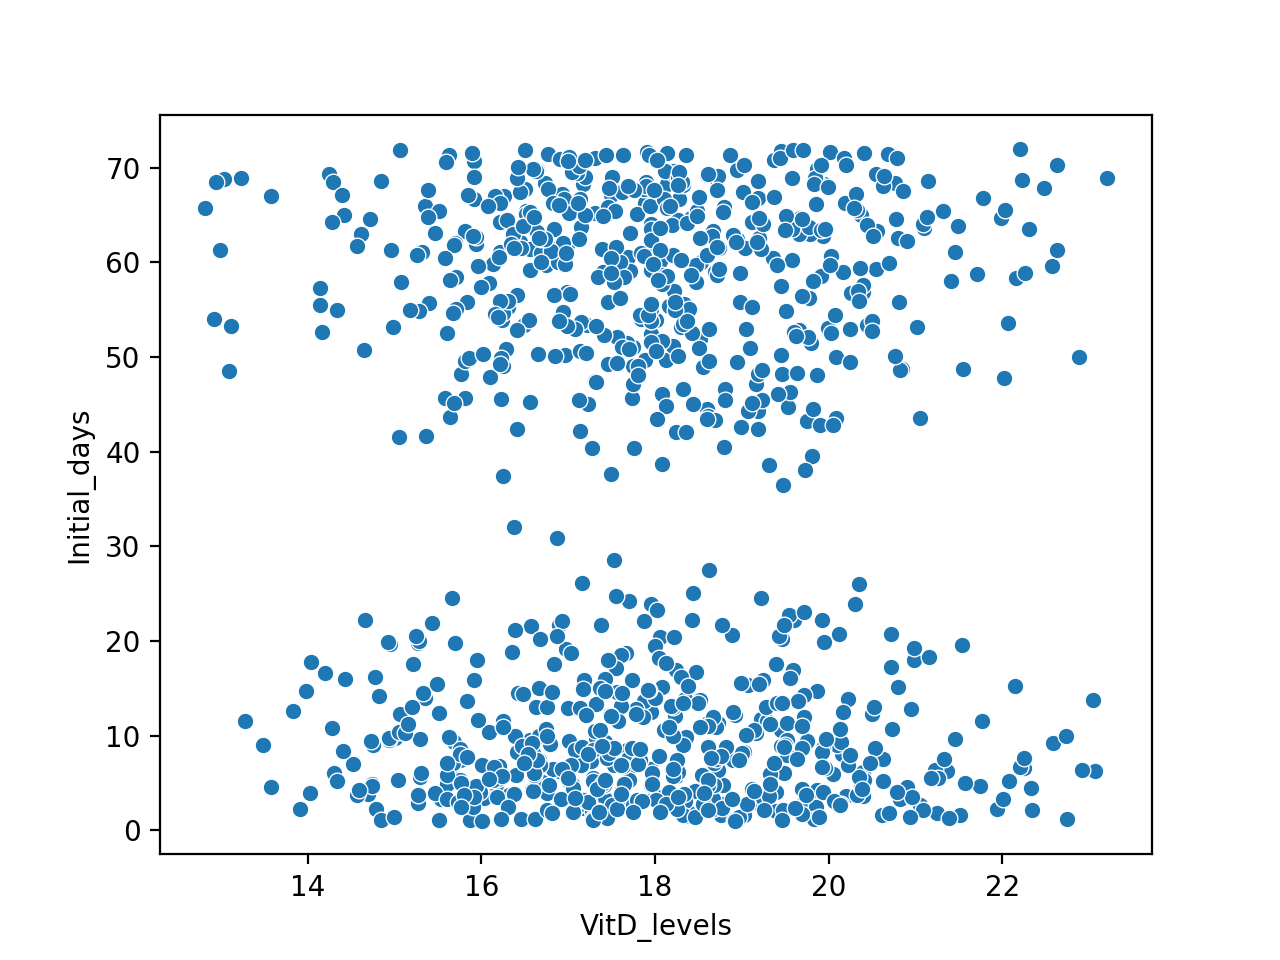

PearsonRResult(statistic=-0.00260027203914892, pvalue=0.7948675238809281)

No significant correlation found between how many days a patient stays at the hospital and their Vitamin D levels.


In [14]:
#Bivariate Scatter Plot - VitD_levels vs. Initial_days

subset = med_data.sample(n=1000, random_state=500)

sns.scatterplot(x='VitD_levels', y='Initial_days', data=subset)
plt.show()

#Run a Pearson-R correlation test
pearson = stats.pearsonr(med_data.VitD_levels, med_data.Initial_days)
print(pearson)
print("")
# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("How long a patient stays in the hospital and their Vitamin D levels are significantly correlated")
else:
    print("No significant correlation found between how many days a patient stays at the hospital and their Vitamin D levels.")